<a href="https://colab.research.google.com/github/saunter999/Machine_learning/blob/master/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~~~~~~~~~~~hyperparameters info~~~~~~~~~~~~
Maximum_iter= 600
tolerance= 0.01
learning rate= 0.3
regularization parameter= 0.01
Flag for normalizing features: True
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Performing feature normalizing~~~~~~~~
Trained Theta= [[1.46623789]
 [3.45333154]
 [3.20371735]]
Prediction value for score(45,85)= [[0.738394]]
Accuracy aka.correct prediction on the whole training set: 0.89


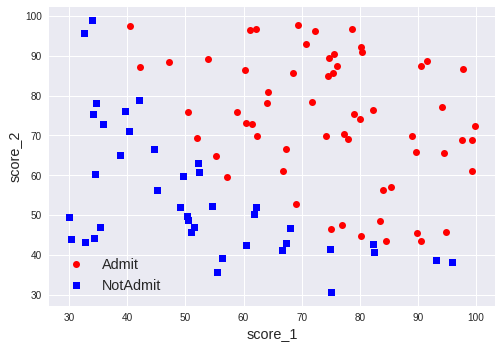

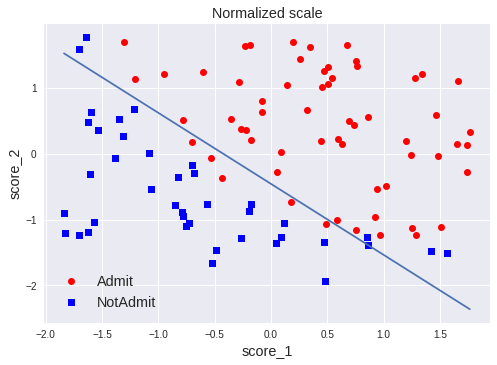

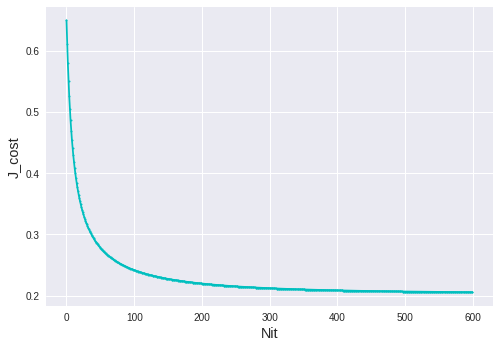

In [4]:
from scipy import *
from pylab import *
import pandas as pd
import numpy as np
from numpy import linalg as LA
from copy import deepcopy as dp

def preview(df):
  data=df.values
  admits=data[data[:,2]==1,:2]
  notadmits=data[data[:,2]==0,:2]
  plot(admits[:,0],admits[:,1],'ro',label='Admit')
  plot(notadmits[:,0],notadmits[:,1],'bs',label='NotAdmit')
  legend(loc=0,fontsize='large')
  xlabel('score_1',size='large')
  ylabel('score_2',size='large')
  

  
class LogRegress:
  def __init__(self,X:np.ndarray,Y:np.ndarray,Nit:int,\
               tol:float,alpha=0.3,C:float=0.0,nfflag:bool=True,costflag:bool=True):
    """
    X is the training data with shape(nsample,nfeatures); Y is the corresponding 
    label with shape(nsample,1).
    Nit-maximum number of iterations
    tol-tolerance
    alpha-learning rate
    C-regularization parameter (L2 norm)
    nfflag: flag for normalizing features
    """
    self.X, self.Nit, self.tol, self.alpha, self.C, self.nfflag, self.costflag= dp(X),dp(Nit),dp(tol),\
    dp(alpha),dp(C),dp(nfflag),dp(costflag)
    print("~~~~~~~~~~~hyperparameters info~~~~~~~~~~~~")
    print("Maximum_iter=",self.Nit)
    print("tolerance=",self.tol)
    print("learning rate=",self.alpha)
    print("regularization parameter=",self.C)
    print("Flag for normalizing features:",self.nfflag)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
    if nfflag: self.Normalfeature()
    if Y.ndim==1: 
       Yn=zeros((self.X.shape[0],1))
       Yn[:,0]=Y[:]
    else: Yn=Y
    self.Y=Yn
    self.nsample,self.nfeature=self.X.shape[0],self.X.shape[1]
    bias=ones((self.nsample,1))
    self.Xb=np.concatenate( (bias,self.X),axis=1)
    self.theta=zeros( (self.nfeature+1,1) )
    #self.grad=zeros( (self.nfeature+1,1) )
    self.cost=[]
    
  def training(self):
      self.theta=self.fmin_custom(self.theta,self.grad_eval,self.alpha)
        
  def grad_eval(self,theta):
      linarg=np.dot(self.Xb,theta)
      h=array([self.logisticfunc(z) for z in linarg])
      grad=zeros( (self.nfeature+1,1) )
      grad=1.0/self.nsample*np.dot( self.Xb.transpose(),h-self.Y )
      grad[1:]+=self.C/self.nsample*theta[1:] ##Adding regularized part into the gradient
      return grad
        
  def fmin_custom(self,theta,gradfunc,learning_rate):
      for i in range(self.Nit):
        grad=gradfunc(theta)
        if LA.norm(grad)**0.5<self.tol: 
           print("Meeting tolerance criteria with tol:",self.tol,"breaking out with iterations=",i)
           return theta
           break
        theta -= grad*learning_rate
        if self.costflag:
           i_cost=np.asscalar( self.costfunction(self.theta) )
          # print(i,'cost=',i_cost,type(i_cost))
           self.cost.append(i_cost)
      return theta
    #print(len(self.cost))  
    
  def Normalfeature(self):
    print("Performing feature normalizing~~~~~~~~")
    nf=self.X.shape[1]
    self.mu=zeros(nf)
    self.std=zeros(nf)
    for i in range(nf):
      self.mu[i]=np.mean(self.X[:,i])
      self.std[i]=np.std(self.X[:,i])
      self.X[:,i]=(self.X[:,i]-self.mu[i])/self.std[i]
    #print(self.mu,self.std)
        
  def costfunction(self,param):
     linarg=np.dot(self.Xb,param)
     h=array([self.logisticfunc(z) for z in linarg])
     cost=1.0/self.nsample*( -np.dot(self.Y.transpose(),log(h) ) \
                            -np.dot(1.0-self.Y.transpose(),log(1.0-h)) )\
                           +self.C/(2*self.nsample)*(LA.norm(self.theta)-self.theta[0]**2) ##Adding regularized part to cost function
     
     return cost
     
        
        
  def predict_prob(self,param,xn):
    """
    param is the trained theta
    xn should have the shape (ntest,nfeature)
    Return the prediction for new data xn
    """
    xn=xn.astype(float)  ##this line is necessary,which is somehow strange
    if self.nfflag:
        nf=xn.shape[1]
        for i in range(nf):
           xn[:,i]=(xn[:,i]-self.mu[i])/self.std[i]
   # print(  param[0]+np.dot(xn,param[1:])  )
    z= param[0]+np.dot(xn,param[1:]) 
    return self.logisticfunc(z) 
  
  def score(self,x,y,param):
    """
    param is the trained theta
    x should have the shape (ntest,nfeature)
    y should have the shape (ntest,1)
    Return the prediction for known data x and its label y
    """
    if y.ndim==1: 
       yn=zeros((x.shape[0],1))
       yn[:,0]=y[:]
       
    pred=self.predict_prob(param,x)>0.5
   # print(pred.shape,yn.shape)
    return ( np.sum (pred==yn)/len(y) )
    

  
  def logisticfunc(self,z):
    return 1.0/(1.0+exp(-z))
  
  def Decisionboundary(self,param):
      admits=self.X[(self.Y==1)[:,0] ]
      notadmits=self.X[(self.Y==0)[:,0] ]
      title("Normalized scale",fontsize='large')
      plot(admits[:,0],admits[:,1],'ro',label='Admit')
      plot(notadmits[:,0],notadmits[:,1],'bs',label='NotAdmit')
      legend(loc=0,fontsize='large')
      xlabel('score_1',size='large')
      ylabel('score_2',size='large')
      ##plot decision boundary
      x1min,x1max=min(self.X[:,0]),max(self.X[:,0])
      bdy_x=[x1min,(x1min+x1max)/2.0,x1max]
      bdy_y=[-(param[0]+param[1]*x)/param[2] for x in bdy_x]
      plot(bdy_x,bdy_y)
    #  print(x1min,x1max)

    
  
if __name__=="__main__":
    url='https://raw.githubusercontent.com/saunter999/datasets/master/score_admit.csv'
    df=pd.read_csv(url,header=None,names=['score1','score2','admit_status'])
    figure(1)
    preview(df)
   
    X,Y,Nit,tol=df.values[:,:-1],df.values[:,-1],600,0.01 
    mylogReg=LogRegress(X,Y,Nit,tol,C=0.01)
    mylogReg.training()
    
    figure(2)
    mylogReg.Decisionboundary(mylogReg.theta)
    
    figure(3)
    plot(range(len(mylogReg.cost)),mylogReg.cost,'co-',markersize=2)
    xlabel("Nit",size='large')
    ylabel("J_cost",size='large')
    print("Trained Theta=",mylogReg.theta)
    print ( "Prediction value for score(45,85)=",mylogReg.predict_prob( mylogReg.theta,array([[45,85]]) ) )
    #Accuracy for correct prediction on the whole training set
    score=mylogReg.score(X,Y,mylogReg.theta)
    print("Accuracy aka.correct prediction on the whole training set:",score)
    show()
